Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [44]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [45]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [46]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/hp/Desktop/PGDML/Deep Learning/M3-CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/hp/Desktop/PGDML/Deep Learning/M3-CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [47]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [48]:
##Verifying few images from the train data set

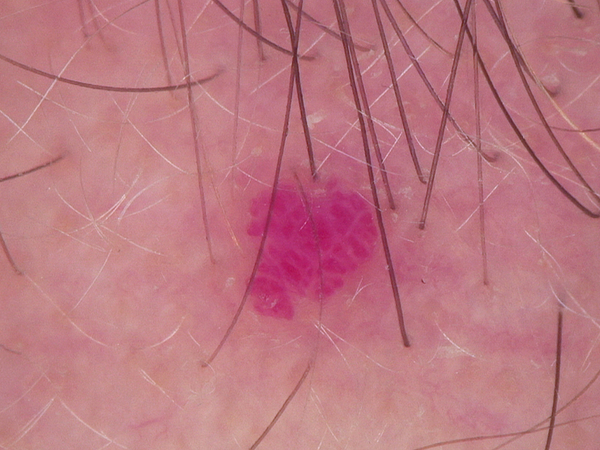

<Figure size 144x144 with 0 Axes>

In [49]:
plt.figure(figsize=(2, 2))
vascular_lesion = list(data_dir_train.glob('vascular lesion/*'))
PIL.Image.open(str(vascular_lesion[0]))

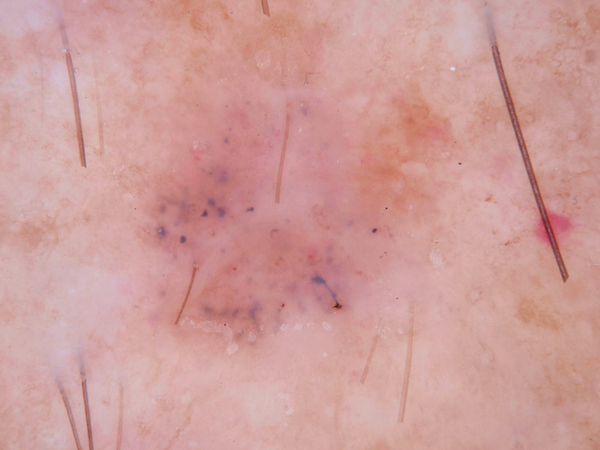

<Figure size 144x144 with 0 Axes>

In [50]:
plt.figure(figsize=(2, 2))
basal_cell_carcinoma = list(data_dir_test.glob('basal cell carcinoma/*'))
PIL.Image.open(str(basal_cell_carcinoma[0]))

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [51]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [52]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [53]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [54]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [55]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [56]:
#import matplotlib library
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

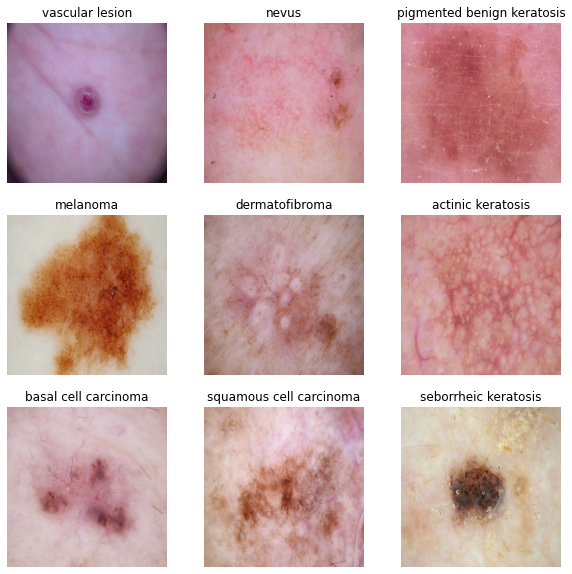

In [57]:
#training set fro visualisation
label=[]
image=[]
plt.figure(figsize=(10, 10))

for images, labels in train_ds:
    for i in range(32):
        if class_names[labels[i]] not in label:
            label.append(class_names[labels[i]])
            image.append(images[i].numpy().astype("uint8"))
        
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i])
    plt.title(label[i])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [58]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

### Your code goes here

*We will use normalization_layer = layers.experimental.preprocessing.Rescaling(1./255) while building the model*


In [59]:
#Creating the model
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Compile the model
Choose an appropirate optimiser and loss function for model training 

*We will try with adam optimiser as it seems to give good output in comparison to other optimisers explained in the hyperparameter tuning module*

*And we will use Sparse cross-entropy as it addresses cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training*

In [61]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [63]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 91s 1s/step - loss: 2.1486 - accuracy: 0.1762 - val_loss: 1.8572 - val_accuracy: 0.3624
Epoch 2/20
56/56 [==============================] - 58s 1s/step - loss: 1.6697 - accuracy: 0.4446 - val_loss: 1.5305 - val_accuracy: 0.4855
Epoch 3/20
56/56 [==============================] - 45s 801ms/step - loss: 1.4176 - accuracy: 0.5205 - val_loss: 1.5557 - val_accuracy: 0.4653
Epoch 4/20
56/56 [==============================] - 45s 798ms/step - loss: 1.2836 - accuracy: 0.5573 - val_loss: 1.4022 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 46s 815ms/step - loss: 1.2077 - accuracy: 0.5859 - val_loss: 1.3694 - val_accuracy: 0.5414
Epoch 6/20
56/56 [==============================] - 46s 819ms/step - loss: 1.1121 - accuracy: 0.5991 - val_loss: 1.3545 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 45s 800ms/step - loss: 1.0426 - accuracy: 0.6289 - val_loss: 1.4614 - val_accuracy: 0.5145
Epoch

### Visualizing training results

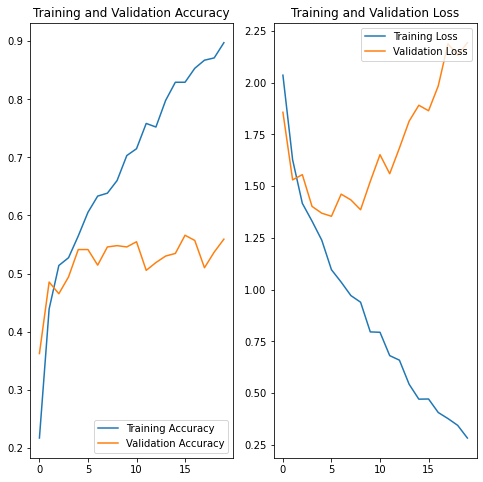

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

**Findings for Model 1--------------->**

*We can see that there is clearly a sign of overfitting above as training accuracy is around 91% and validation accuracy is around 53 % . Hence, we need to take further steps to resolve the same.*


In [65]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

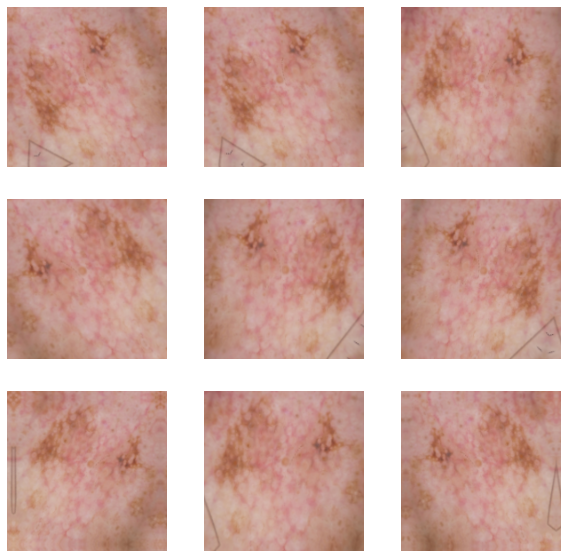

In [66]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [67]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## As mentioned adding droput layer to in the model below so as to add a bit of regularization too
## Your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


### Compiling the model

In [68]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [70]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 53s 919ms/step - loss: 1.9863 - accuracy: 0.2535 - val_loss: 1.9884 - val_accuracy: 0.2729
Epoch 2/20
56/56 [==============================] - 51s 912ms/step - loss: 1.7383 - accuracy: 0.3689 - val_loss: 1.5388 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 51s 913ms/step - loss: 1.5059 - accuracy: 0.4755 - val_loss: 1.4939 - val_accuracy: 0.4653
Epoch 4/20
56/56 [==============================] - 51s 912ms/step - loss: 1.4887 - accuracy: 0.4723 - val_loss: 1.4631 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 51s 915ms/step - loss: 1.3704 - accuracy: 0.5380 - val_loss: 1.3673 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 51s 917ms/step - loss: 1.3635 - accuracy: 0.4945 - val_loss: 1.3675 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 51s 907ms/step - loss: 1.3245 - accuracy: 0.5320 - val_loss: 1.3512 - val_accuracy: 0.5347

### Visualizing the results

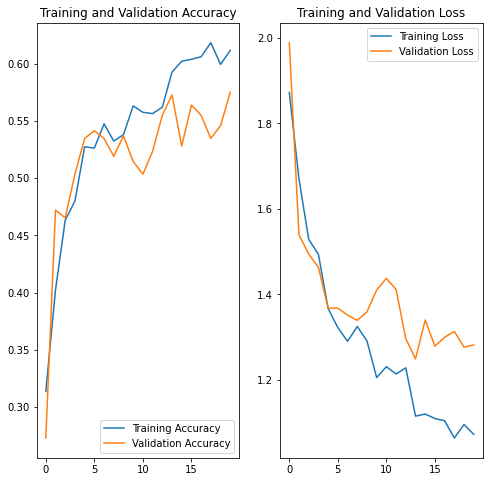

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Findings for Model 2--------------->**

*We can see that after performing data augmentation that although the accuracy has gone down the overfitting has reduced.
There is very less difference in the training(60%) and validation dataset accuracy(53%) as opposed to a huge difference in the first model. Hence, we can say that the agmentation has been able to reduce the overfitting.*


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

**Finding the distribution of classes to verify if there is any claa imbalance**

In [73]:
## Your code goes here.

for i in class_names:
    directory = pathlib.Path("C:/Users/hp/Desktop/PGDML/Deep Learning/M3-CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{}/".format(i))
    length = len(list(directory.glob('*')))
    print(f'{i} contains: {length} images')


actinic keratosis contains: 114 images
basal cell carcinoma contains: 376 images
dermatofibroma contains: 95 images
melanoma contains: 438 images
nevus contains: 357 images
pigmented benign keratosis contains: 462 images
seborrheic keratosis contains: 77 images
squamous cell carcinoma contains: 181 images
vascular lesion contains: 139 images


#### **Todo:** Write your findings here: 

**Analysis**

#### - Which class has the least number of samples?
*Finding-*

*seborrheic keratosis contains: 77 images which is the least amongst all*

#### - Which classes dominate the data in terms proportionate number of samples?
*Finding-*

*pigmented benign keratosis contains: 462 images which is is most dominant in terms of proportionate number of samples*

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

**Rectifying the Class Imbalance using Augmentor Library**

In [74]:
!pip install Augmentor

You should consider upgrading via the 'c:\users\hp\anaconda3\python.exe -m pip install --upgrade pip' command.


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [75]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path("C:/Users/hp/Desktop/PGDML/Deep Learning/M3-CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/{}/".format(i)))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BA19CB81F0>: 100%|█| 500/500 [00:16<00:00, 31.04 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1BA1D9BD2B0>: 100%|█| 500/500 [00:16<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BA149899A0>: 100%|█| 500/500 [00:17<00:00, 29.28 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1BA1405D730>: 100%|█| 500/500 [01:06<00:00,  7.48 Samples


Initialised with 357 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1019x717 at 0x1BA1928ACA0>: 100%|█| 500/500 [00:57<00:00,  8.74 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BA140862B0>: 100%|█| 500/500 [00:14<00:00, 33.58 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1BA1929DA60>: 100%|█| 500/500 [00:31<00
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BA12B7C520>: 100%|█| 500/500 [00:14<00:00, 34.34 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1BA14994850>: 100%|█| 500/500 [00:15<00:00, 31.32 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [76]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [77]:
#imported - from glob import glob in the beginning before using glob here
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_35b42082-2096-4b79-aab5-a2b131b44018.jpg',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_560382d0-19f3-4213-a039-6eb86f1b4f78.jpg',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5d77d50c-493d-4f8c-88b3-eec979b0c77e.jpg',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_610e8bb4-22e7-4972-b65a-c933317f584d.jp

In [78]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [79]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_new

{'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_35b42082-2096-4b79-aab5-a2b131b44018.jpg': 'actinic keratosis',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_560382d0-19f3-4213-a039-6eb86f1b4f78.jpg': 'actinic keratosis',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5d77d50c-493d-4f8c-88b3-eec979b0c77e.jpg': 'actinic keratosis',
 'C:\\Users\\hp\\Desktop\\PGDML\\Deep Learning\\M3-CNN Assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_or

In [80]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2
new_df

,Path,Label
0,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,actinic keratosis
1,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,actinic keratosis
2,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,actinic keratosis
3,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,actinic keratosis
4,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,actinic keratosis
...,...,...
4495,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,vascular lesion
4496,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,vascular lesion
4497,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,vascular lesion
4498,C:\Users\hp\Desktop\PGDML\Deep Learning\M3-CNN...,vascular lesion


In [81]:
new_df['Label'].value_counts()

squamous cell carcinoma       500
nevus                         500
seborrheic keratosis          500
pigmented benign keratosis    500
basal cell carcinoma          500
actinic keratosis             500
dermatofibroma                500
melanoma                      500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [82]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [83]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [84]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [85]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [87]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Findings for Model 3--------------->**

*Hence we can see that after handling the class imbalance , the accuracy has increased and the model is also performing well on both training(80.75%) and validation dataset(75.20%)*

**CONCLUSION -**

*The accuracy post handling class imabalance amd overfitting is  80.75% on training dataset and 75.20% on validation dataset whihc is a good number to proceed with.*

